# B_HIT.st tutorial

## filter process

First, let us load the packages that will be necessary for the analysis.

In [1]:
import B_HIT
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

We can download the full dataset through the github(*web*).
Meanwhile, we use genes closely related to B cells to distinguish B cells from other cells.

In [2]:
adata = sc.read("./data/twosamples.h5ad")
signature = ["CD79A", "CD79B", "MS4A1", "CD79A", 'CD79B', "MZB1", "JCHAIN", "IGHA1", 'IGHG1', 'IGHG3']
score_name = 'Bcell_enrichment'
sc.tl.score_genes(adata, gene_list=signature, score_name=score_name)

We filter the cells by **B_HIT.st.tl.kde_filter**, plot them by **B_HIT.st.pl.enrichment_score**, visualizing the results.

P0608_CC
Step 1 (Prepare): 0.13 s
Step 2 (kde score): 58.16 s
Step 3 (obtain legal coords): 1.02 s


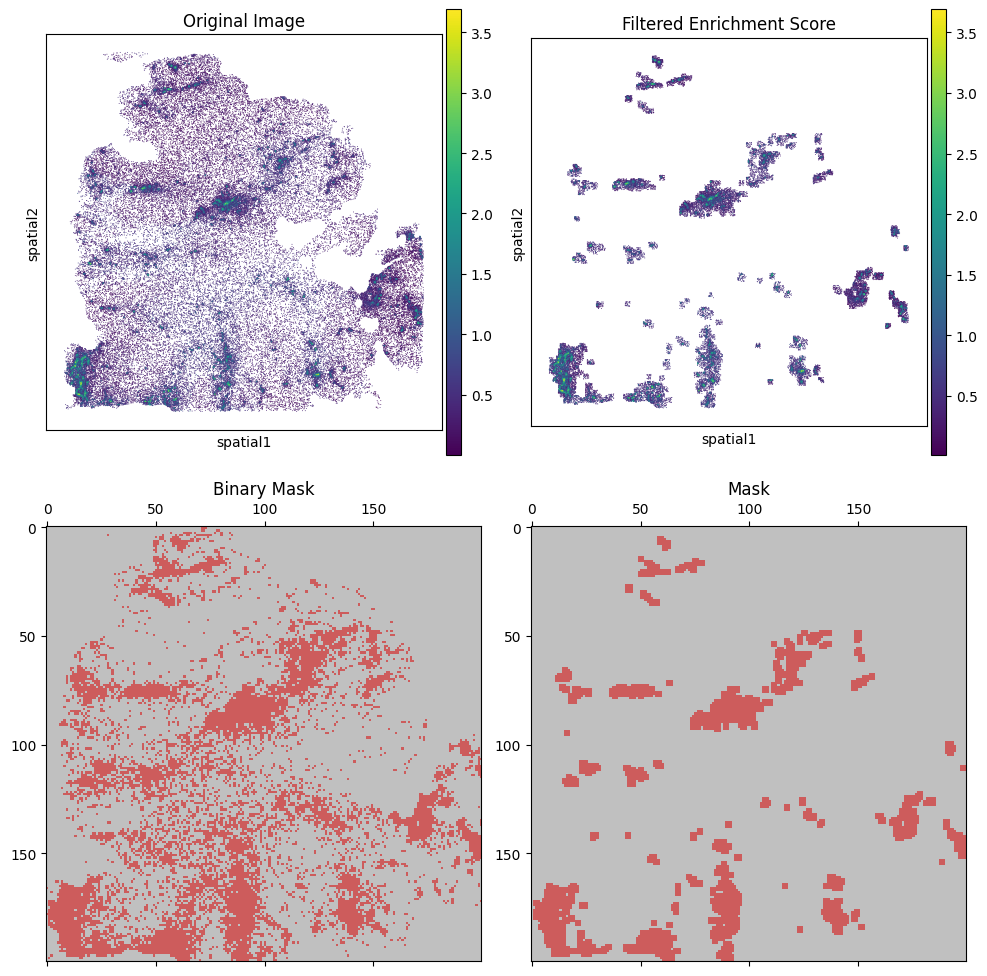

P1121_LM
Step 1 (Prepare): 0.99 s
Step 2 (kde score): 134.49 s
Step 3 (obtain legal coords): 6.29 s


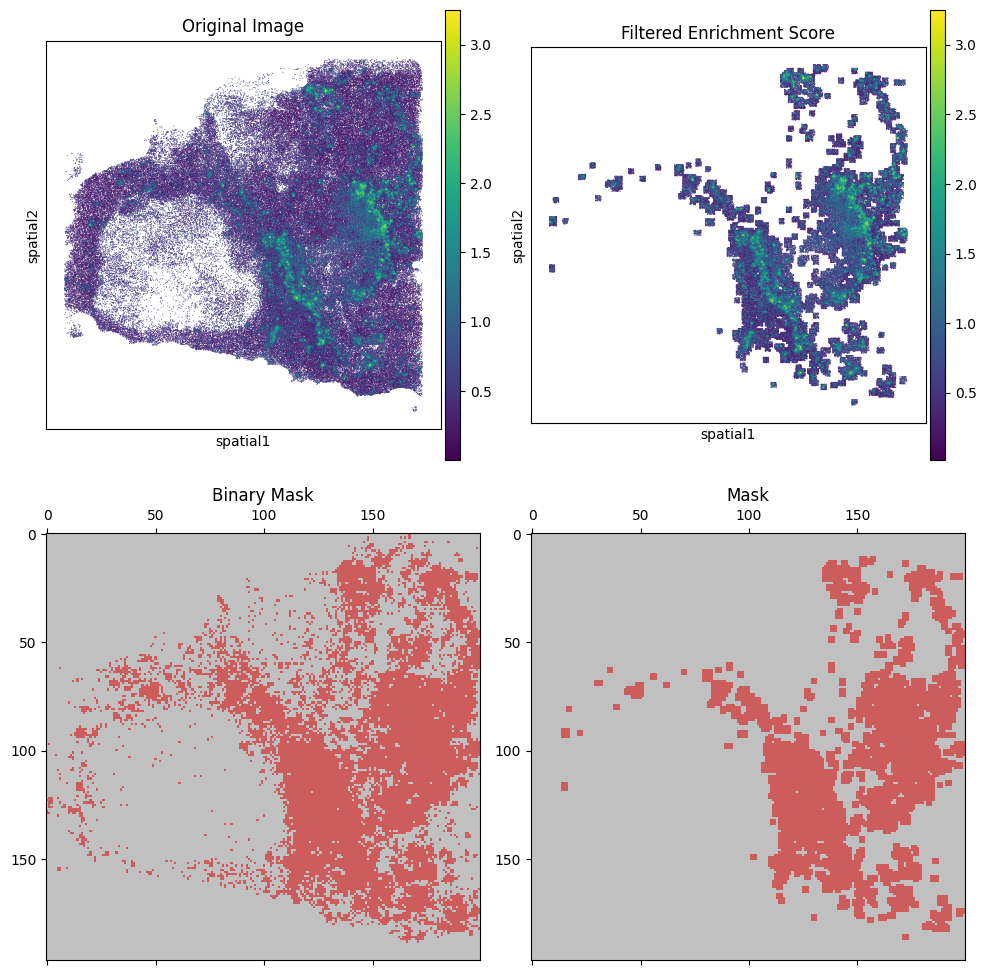

View of AnnData object with n_obs × n_vars = 152726 × 25091
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'annotations', 'GEX_leiden', 'celltype', 'epiHRC', 'epiEMT', 'epiStem', 'CancerClass', 'celltype_1', 'T_score', 'loc', 'loc_1', 'celltype_2', 'Ribosome-related', 'TA-like', 'InjureRepair', 'Absorptive-like', 'CryptBottom-like', 'Secretory-like', 'Tuft-like', 'cancerType', 'Others', 'MuscleCell', 'B', 'Endothelial', 'NK', 'Macrophages', 'Fibroblast', 'T', 'DC', 'Malignant', 'sample', 'macro_class', 'SPP1+IL1+ macro', 'SPP1+TREM2+ macro', 'SPP1+MMP+ macro', 'FOLR2+ macro', 'CXCL9+ macro', 'T_subtype', '_scvi_batch', '_scvi_labels', 'spatial_cluster', 'patient', 'tissue', 'spatial_cluster_1', 'spatial_cluster_2', 'TLS', 'Bcell_enrichment'
    var: 'mt'
    uns: '_cellcharter', '_scvi_manager_uuid', '_scvi_uuid', 'rank_genes_groups', 'spatial_cluster_colors', 'spatial_fov', 'spatial_neighbors'
    obsm: 'X_cellcharter', 'X_pca', 'X_scVI', 

In [3]:
adata = adata[adata.obs[score_name]>0]
ad_cut = []
samples = set(adata.obs['sample'])
for sample in samples:
    print(sample)
    adata_tmp = adata[adata.obs['sample'].isin([sample])]
    ad_cut.append(B_HIT.st.tl.kde_filter(adata_tmp, score_name))
    B_HIT.st.pl.kde_results(adata_tmp, score_name, plot_masks=True, plot_enrichment=True, figsize=(10, 10), spot_size=50)
enrichedAd = ad.concat(ad_cut)
enrichedAd = adata[enrichedAd.obs.index]
print(enrichedAd)

## cluster process

**DBSCAN** can be used to classify and visualize the filtered results.

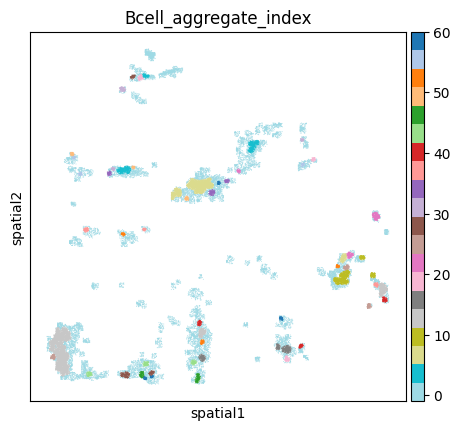

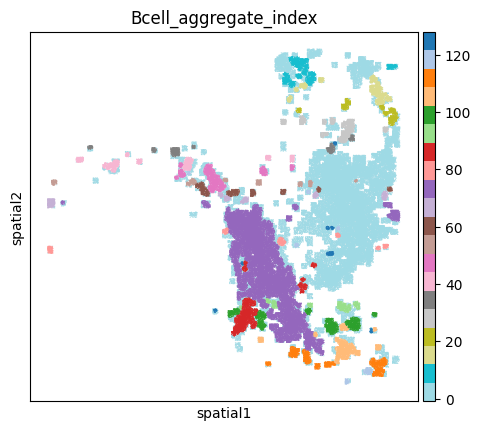

In [4]:
res_sample_ad = [] 
samples = set(enrichedAd.obs['sample']) 

for sample in samples:
    ad_sample = enrichedAd[enrichedAd.obs['sample']==sample].copy()
    ad_sample = B_HIT.st.tl.dbscan_filter(ad_sample, eps=100, min_samples=50)
    res_sample_ad.append(ad_sample)

res_ad = ad.concat(res_sample_ad) 

Generate neighbors from the data, and use **ClusterAutoK** to determine the most appropriate number of clusters.

  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 1/2


GPU available: True (cuda), used: True                                                                                                                   | 0/5 [00:00<?, ?it/s]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: True (cuda), used: True
TPU available: False, u

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True                                                                                                          | 1/5 [07:38<30:35, 458.88s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availabl

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████▌                                                                                   | 2/5 [15:30<23:18, 466.33s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=7` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availabl

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████████████████████████████████▍                                                       | 3/5 [23:31<15:46, 473.21s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availabl

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████████████████████████████████████████████████████████████▏                           | 4/5 [32:13<08:12, 492.52s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=11` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availab

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [40:12<00:00, 482.56s/it]


[[0.16185006, 0.15761554, 0.10639121, 0.09760838, 0.11401569]]
Iteration 2/2


GPU available: True (cuda), used: True                                                                                                                   | 0/5 [00:00<?, ?it/s]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availabl

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True                                                                                                          | 1/5 [08:08<32:34, 488.59s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, 

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████▌                                                                                   | 2/5 [14:13<20:46, 415.60s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=7` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availabl

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████████████████████████████████▍                                                       | 3/5 [21:59<14:37, 438.68s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, 

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

GPU available: True (cuda), used: True██████████████████████████████████████████████████████████████████████████████▏                           | 4/5 [30:03<07:36, 456.78s/it]
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=11` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU availab

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [38:26<00:00, 461.36s/it]


[[0.16185006, 0.15761554, 0.10639121, 0.09760838, 0.11401569], [0.16148472, 0.15749086, 0.10639121, 0.13395573, 0.10797189]]


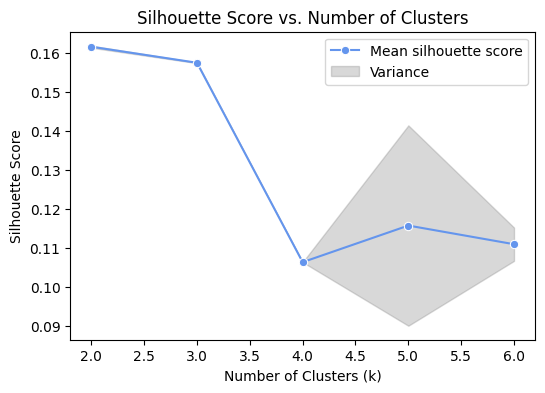

In [5]:
B_HIT.st.gr.aggregate_neighbors(enrichedAd, n_layers=3, 
                                use_rep='X_scVI', out_key='X_scVI_hop3',
                                sample_key='sample', connectivity_key='spatial_connectivities')
model = B_HIT.st.tl.ClusterAutoK(n_clusters=(2,6), max_runs=2)
model.fit(enrichedAd, use_rep='X_scVI_hop3')
B_HIT.st.pl.silhouette_scores(model, (2, 6))

From the previous cell, 5 is the most appropriate number of clusters, so the number of categories is selected as 5, and **the GMM model** is used to cluster and the clustering results are visualized.

P0608_CC


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVI

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

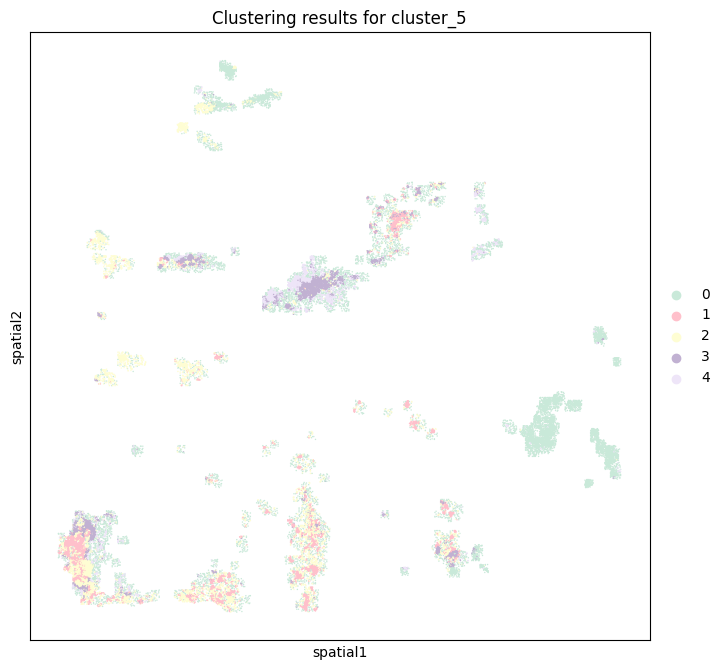

P1121_LM


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVI

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

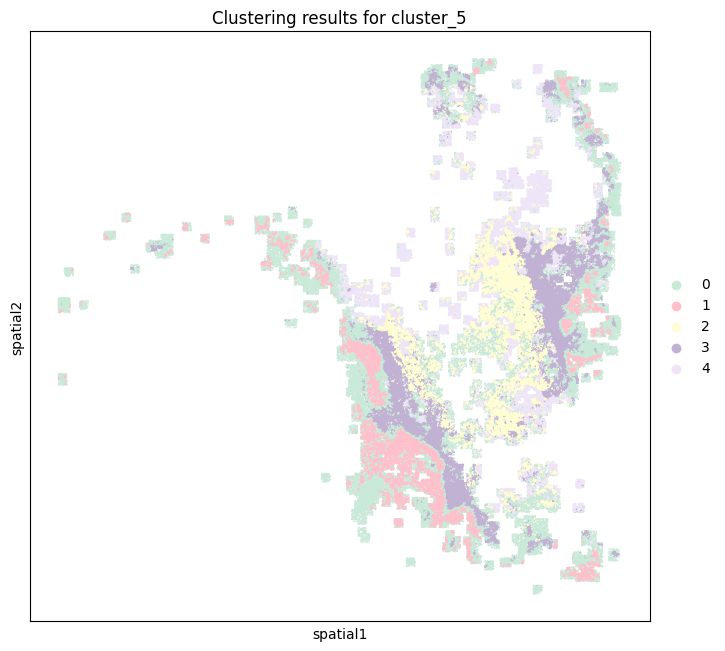

In [6]:
clusterer = B_HIT.st.tl.Cluster(n_clusters=5)  # 设置 5 个聚类
samples = set(enrichedAd.obs['sample'])
for sample in samples:
    print(sample)
    adata_tmp = enrichedAd[enrichedAd.obs['sample'].isin([sample])]
    clusterer.fit(adata_tmp, use_rep="X_cellcharter")
    clusterer.predict(adata_tmp, use_rep = 'X_scVI_hop3', store_labels = True, store_column = "cluster_5")
    B_HIT.st.pl.clustering_results(adata_tmp, cluster_column="cluster_5")